# エムグラム性格診断データ　レポート

## 最初に
性格診断エムグラムのデータを元に、統計的傾向を調査しました。今回はテスト的に要因の1つである活動性に焦点を当てて相関を調査しました。

また、ピアソンの相関係数で要因ごとの相関を見てきます。

## 目次

1.活動性とその他13要因の相関

2.全体的な傾向（ピアソン相関係数）

# 1.活動性とその他13要因の相関

### データの読み込み

In [ ]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [43]:
data = pd.read_csv('users_profiling_results_view.csv', encoding="shift-jis")

In [44]:
factor_data1 = data.ix[:, 2:13]

/Users/ericfesta/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [45]:
factor_data2 = data.ix[:, 20:23]

In [46]:
factor_data = pd.concat([factor_data1, factor_data2], axis=1)
factor_data_init = factor_data

In [6]:
factor_data=factor_data.rename(index=str, columns={"factor2_1":"活動性","factor2_2":"社交性","factor2_3":"慎重性","factor2_4":"新規性","factor2_5":"固執性","factor2_6":"主体性", "factor2_7":"決断性","factor2_8":"精神的耐性","factor2_9":"論理型","factor2_10":"共感性","factor2_11":"直感型","factor2_19":"傾聴スキル","factor2_20":"葛藤対処スキル","factor2_21":"自己主張スキル"})
factor_data

,活動性,社交性,慎重性,新規性,固執性,主体性,決断性,精神的耐性,論理型,共感性,直感型,傾聴スキル,葛藤対処スキル,自己主張スキル
0,48,48,50,51,45,27,44,39,54,41,47,46,40,45
1,51,53,52,55,49,56,57,32,71,54,45,41,45,45
2,50,44,50,60,47,43,67,53,62,39,23,49,66,51
3,30,27,70,44,70,68,75,60,52,81,35,42,61,74
4,43,45,50,59,39,53,50,54,56,67,50,49,75,56
5,49,37,45,52,37,23,33,30,45,34,38,48,43,47
6,44,50,72,59,47,36,45,32,62,55,59,65,40,48
7,30,37,60,37,66,27,41,40,39,38,53,49,45,64
8,54,47,55,54,59,46,69,43,56,59,37,48,66,48
9,66,55,30,70,30,37,51,42,65,48,47,58,34,50


## 可視化
### 相関グラフ

In [10]:
# data = sns.load_dataset("factor2_1")
sns.pairplot(factor_data);

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


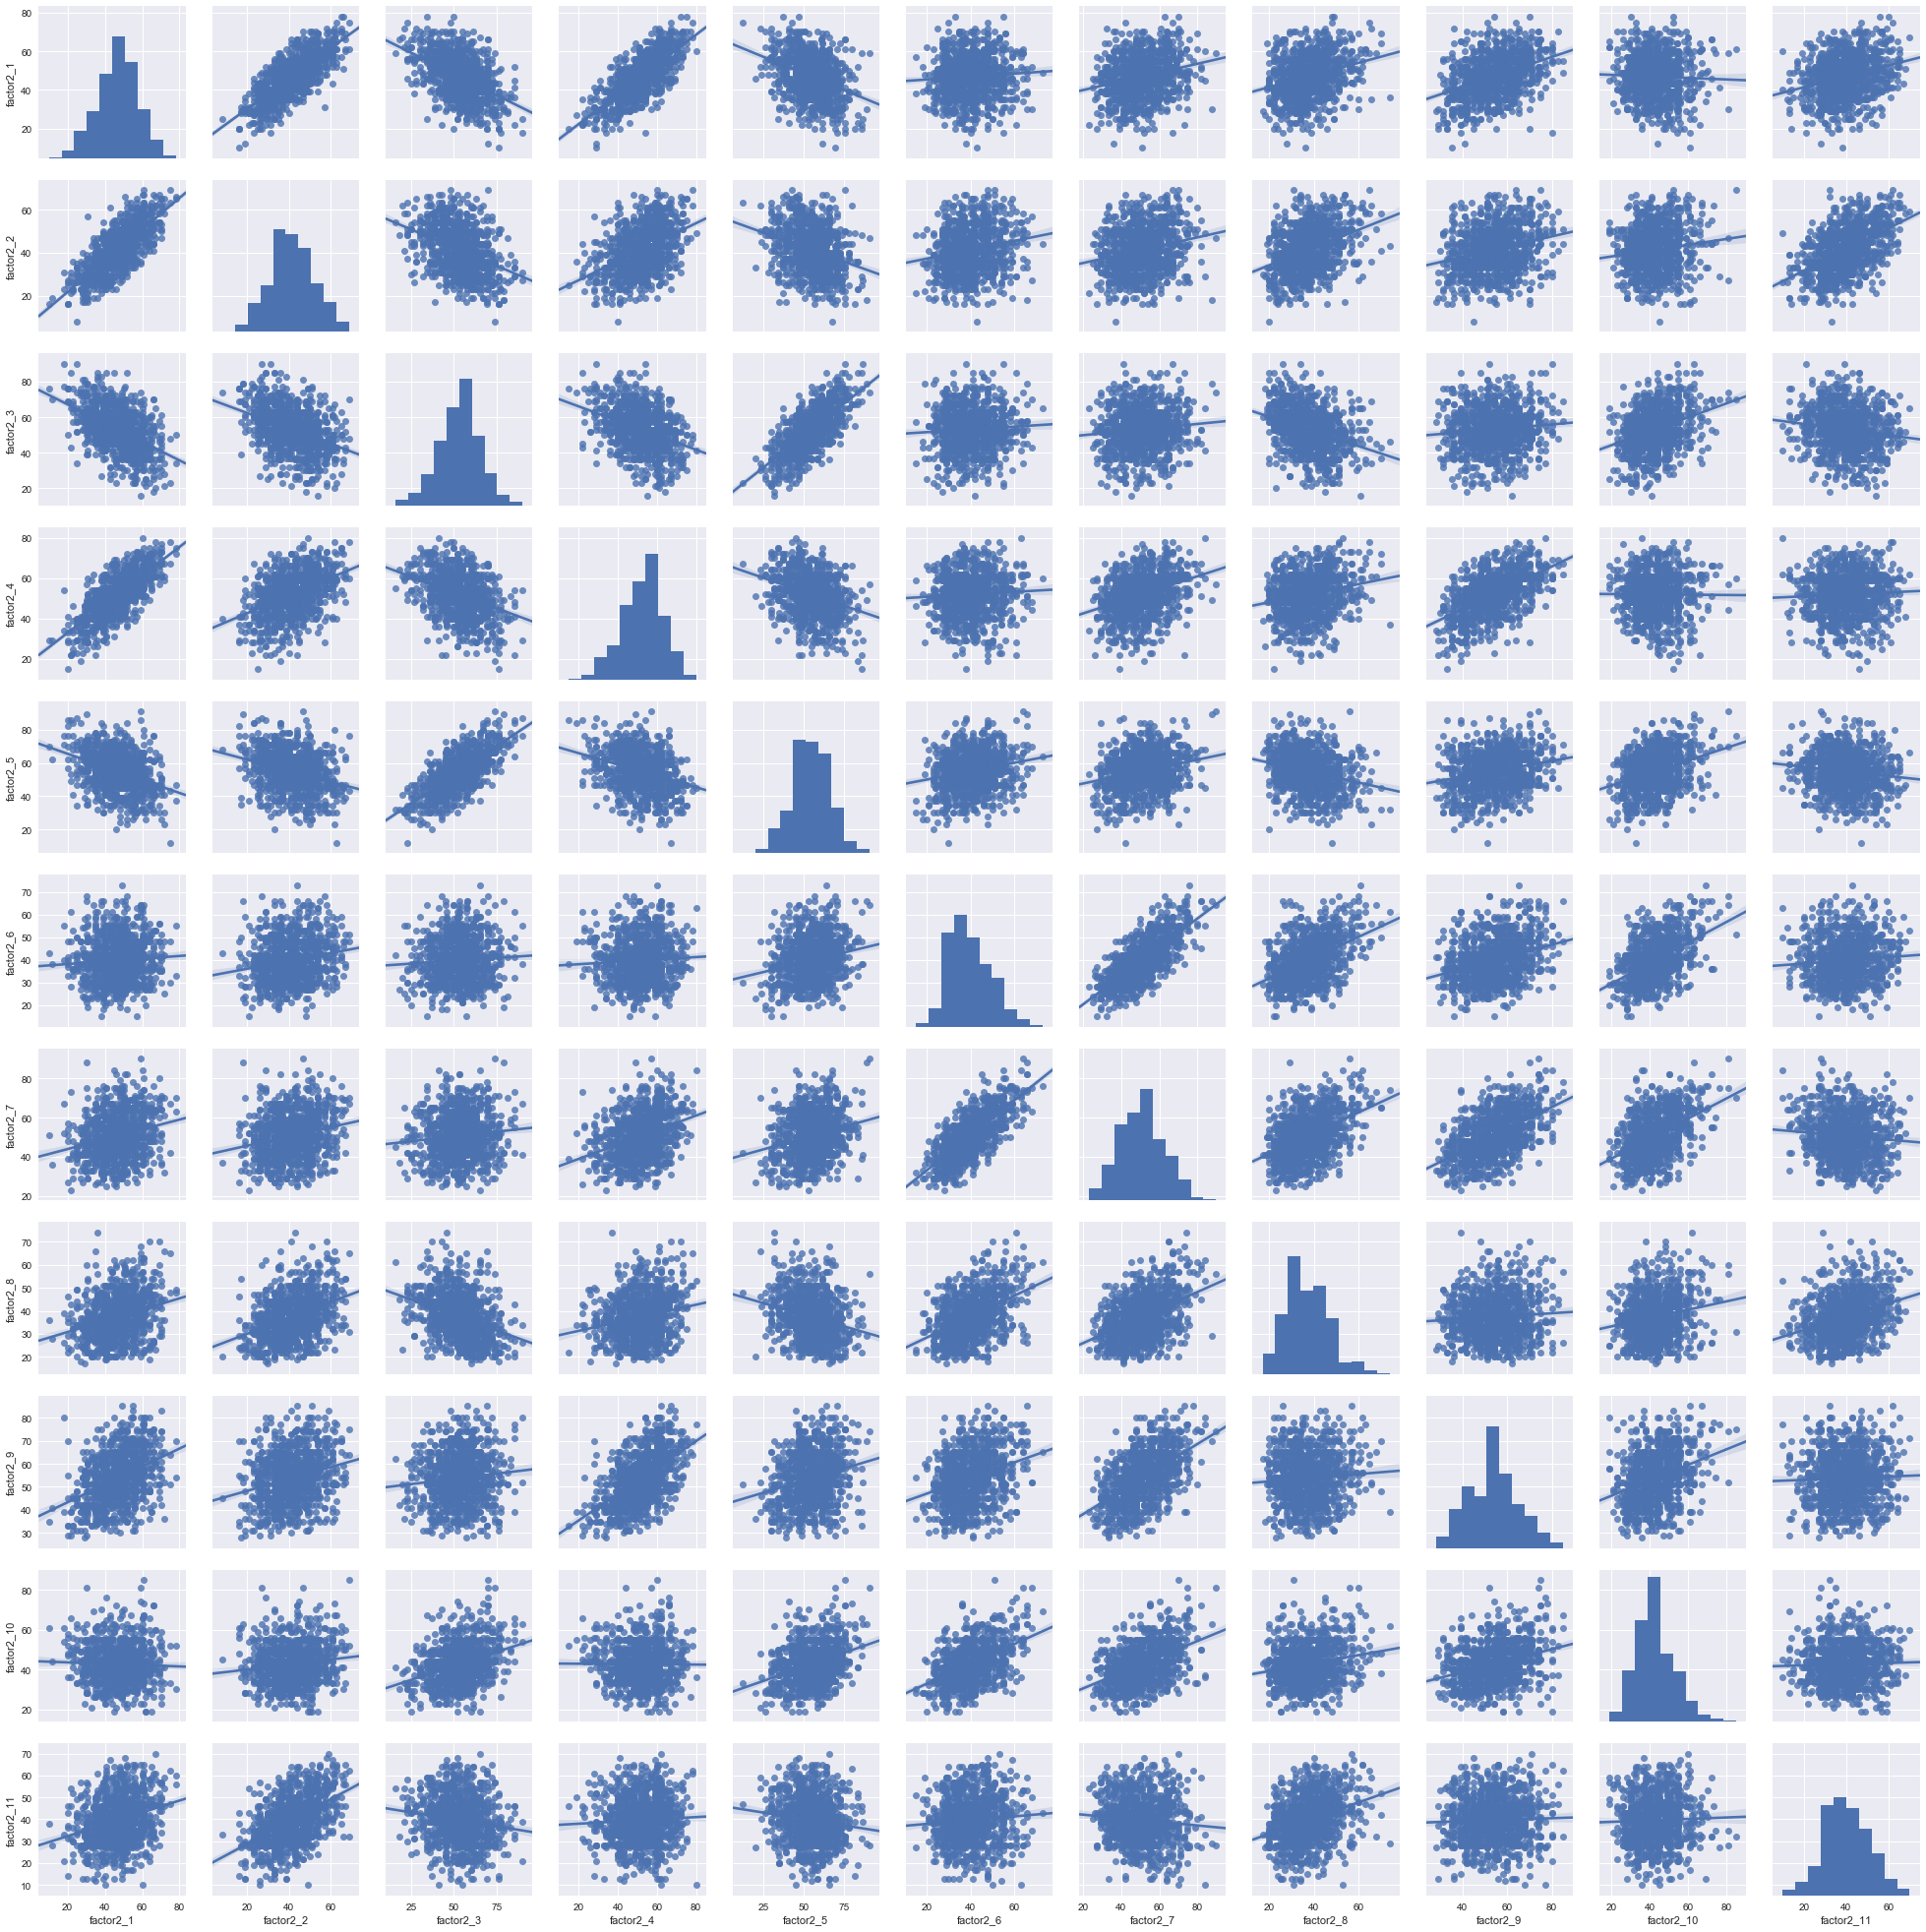

In [147]:
sns.pairplot(factor_data1,kind="reg");

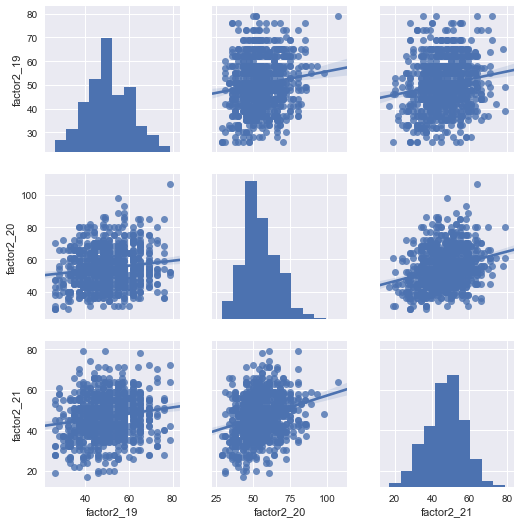

In [148]:
sns.pairplot(factor_data2,kind="reg");

/Users/ericfesta/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


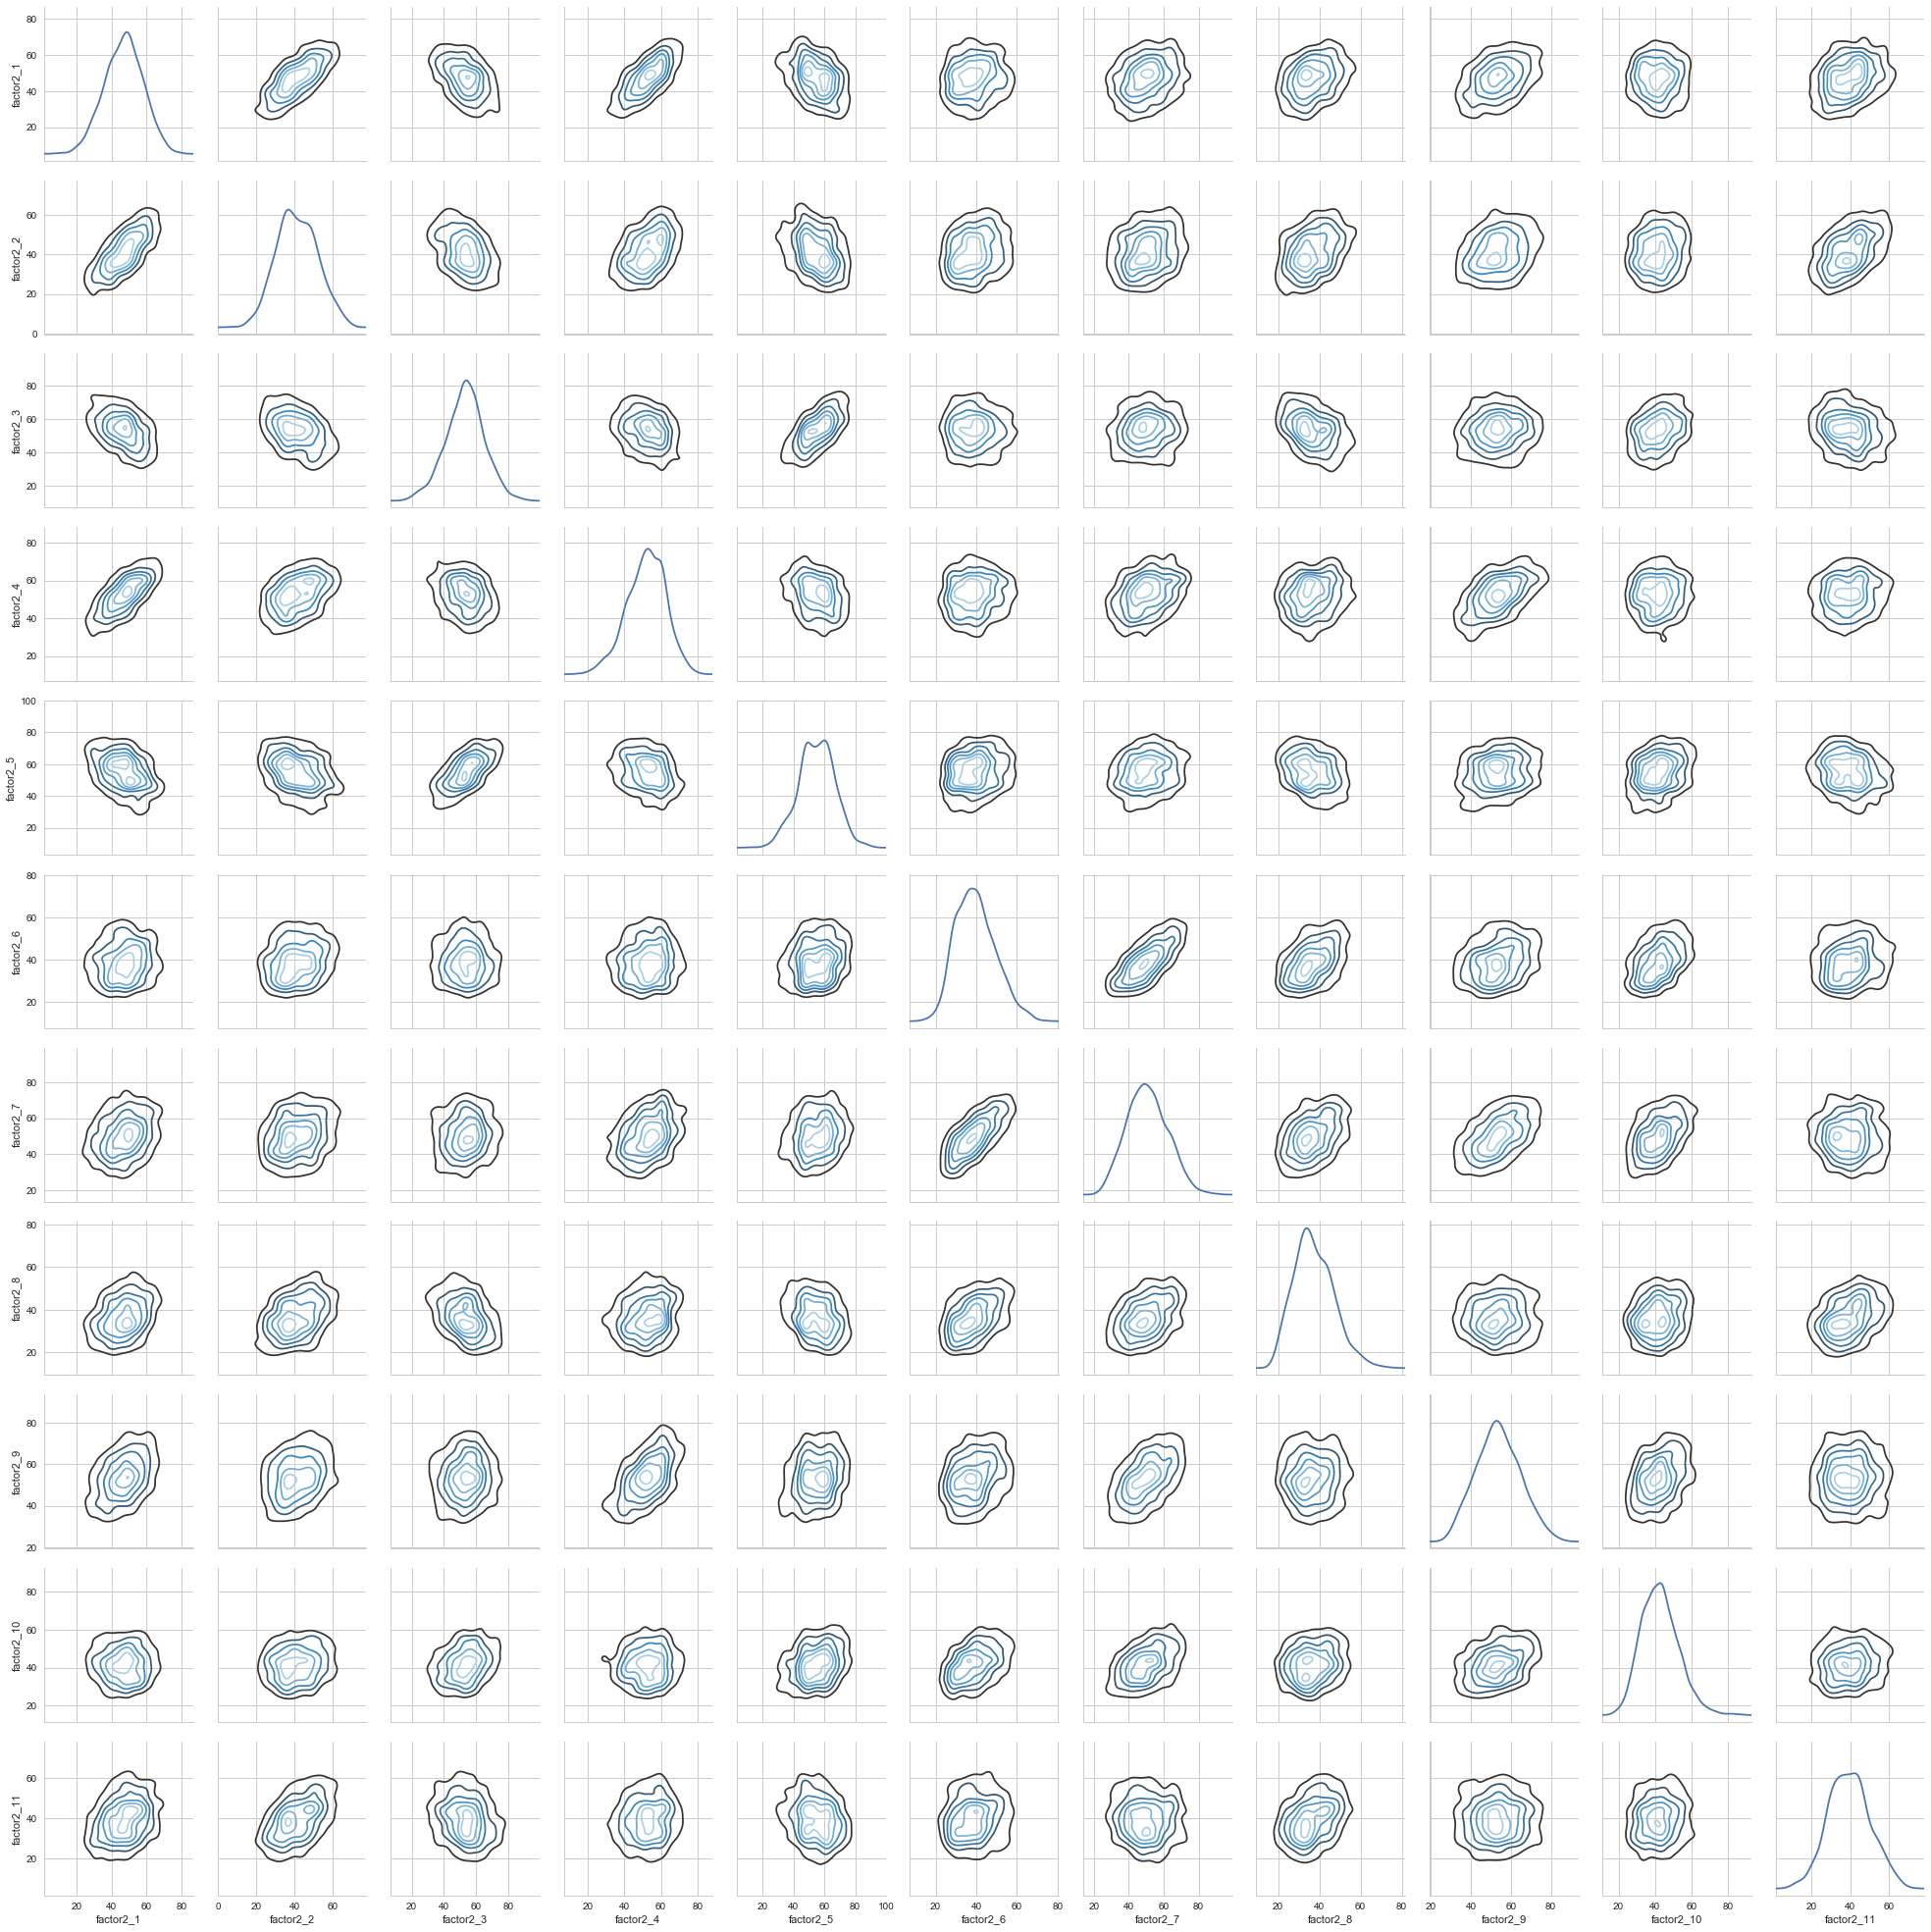

In [37]:
g = sns.PairGrid(factor_data1)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

/Users/ericfesta/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


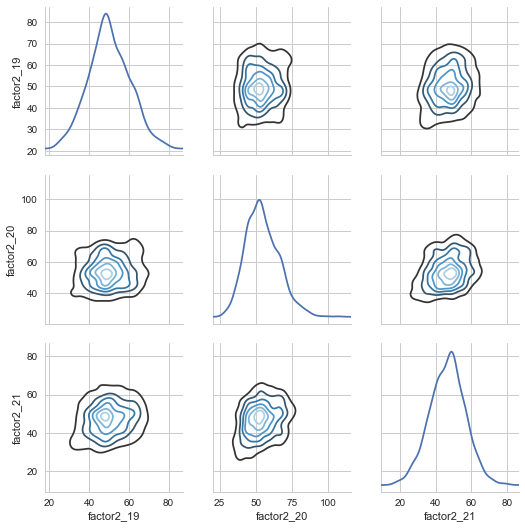

In [36]:
g = sns.PairGrid(factor_data2)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);


#### 例）１４つの中の１つを抽出　"活動性"

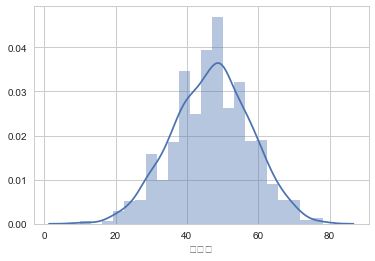

In [9]:
sns.distplot(factor_data["活動性"])

信頼区間９５％ 正規分布に近い

### 活動性と各データとの相関と分散と回帰直線

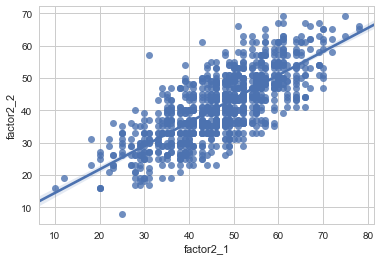

In [41]:
data = factor_data.ix[:,0:2]
(x="factor2_1", y="factor2_2", data=data)

活動性と社会性は正の相関　分散は小

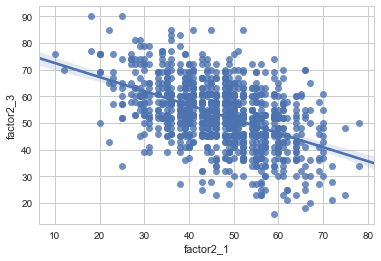

In [57]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_3", data=data)

活動性と慎重性は負の相関　分散は大

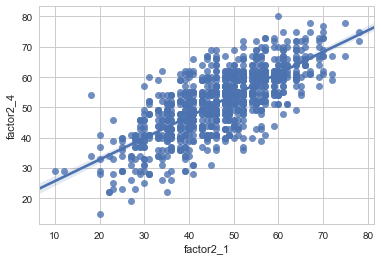

In [58]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_4", data=data)

活動性と新規性は正の相関　分散は小

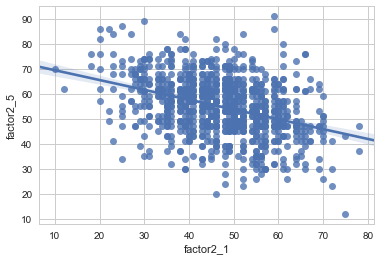

In [59]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_5", data=data)

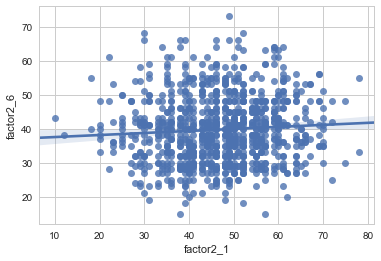

In [60]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_6", data=data)

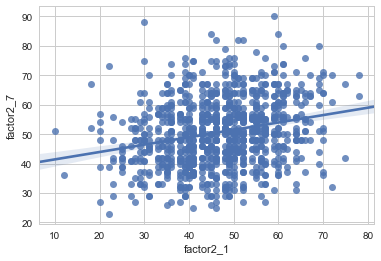

In [61]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_7", data=data)

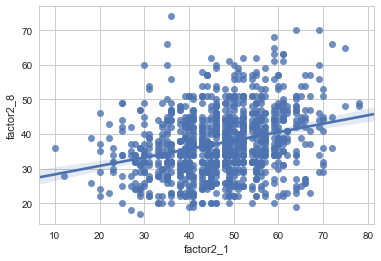

In [62]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_8", data=data)

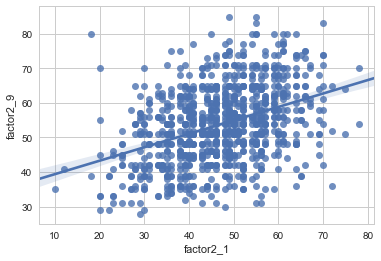

In [63]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_9", data=data)

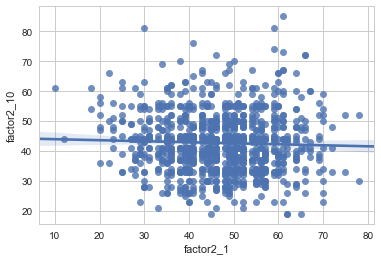

In [64]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_10", data=data)

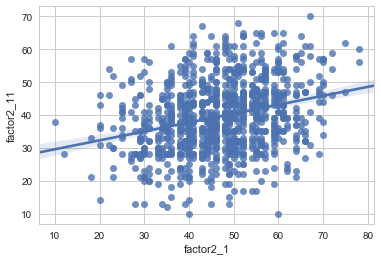

In [65]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_11", data=data)

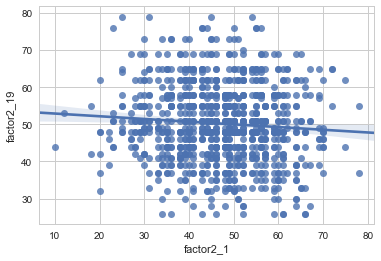

In [67]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_19", data=data)

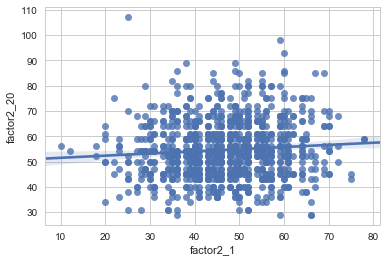

In [68]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_20", data=data)

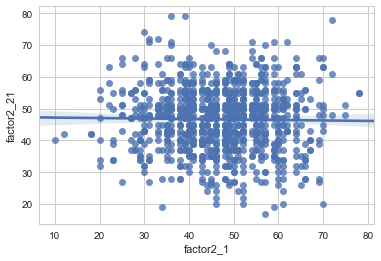

In [70]:
data = factor_data
sns.regplot(x="factor2_1", y="factor2_21", data=data)

## 重回帰分析
"活動性"を目的変数として、それ以外を説明変数をして重回帰分析

In [13]:
from sklearn import linear_model
clf = linear_model.LinearRegression()


# #正則化
# dec_data = factor_data.apply(lambda x: (x - np.mean(x))/(np.max(x)-np.min(x)))
# # dec_data.head()
dec_data = factor_data
dec_data2 = dec_data.drop("活動性", axis=1) 
X = dec_data2.as_matrix()

Y = dec_data["活動性"].as_matrix()

clf.fit(X, Y)

# 偏回帰係数
coefficients = np.abs(clf.coef_)
print(pd.DataFrame({"Name":dec_data2.columns,"coefficients":coefficients}))

       Name  coefficients
0       社交性      0.556231
1       慎重性      0.121959
2       新規性      0.453156
3       固執性      0.020104
4       主体性      0.060182
5       決断性      0.050603
6     精神的耐性      0.042247
7       論理型      0.037980
8       共感性      0.065675
9       直感型      0.003808
10    傾聴スキル      0.020752
11  葛藤対処スキル      0.008260
12  自己主張スキル      0.027744


/Users/ericfesta/anaconda/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


偏回帰係数とは、それ以外の説明変数を固定した場合にその説明変数が１増加するとどれだけ増加減少するか

偏回帰係数が最も小さいのが直感型
最も大きいのが社交性
つまり、活動性に与える影響の度合いを示す

(検定や信頼区間、t値は省略)

####  予測値

In [17]:
sum(clf.predict(X))

46887.000000000044

#### 決定係数

In [29]:
clf.score(X, factor_data['社交性'])

0.42321782642265504

### 考察
活動性に関して言うと、社交性と最も関連があり、直感型と関連が薄いと説明できることがわかったので、
新しい仮説としては、活動的な人は社交性も高い傾向にあり
一方で、活動的な人は直感で動かない傾向にあるという仮説が立てれる

## 正規化して重回帰
各変数がどの程度目的変数に影響しているかを確認するには、各変数を正規化 (標準化) し、平均 = 0, 標準偏差 = 1 になるように変換した上で、重回帰分析を行うと偏回帰係数の大小で比較

In [138]:
from sklearn import linear_model
clf = linear_model.LinearRegression()


#正則化
dec_data = factor_data.apply(lambda x: (x - np.mean(x))/(np.max(x)-np.min(x)))
# dec_data.head()

dec_data2 = dec_data.drop("活動性", axis=1) 
X = dec_data2.as_matrix()

Y = dec_data["活動性"].as_matrix()

clf.fit(X, Y)

# 偏回帰係数
coefficients = np.abs(clf.coef_)
print(pd.DataFrame({"Name":dec_data2.columns,"coefficients":coefficients}))

       Name  coefficients
0       社交性      0.498972
1       慎重性      0.132720
2       新規性      0.433164
3       固執性      0.023356
4       主体性      0.051332
5       決断性      0.049859
6     精神的耐性      0.035413
7       論理型      0.031837
8       共感性      0.063743
9       直感型      0.003360
10    傾聴スキル      0.016175
11  葛藤対処スキル      0.009475
12  自己主張スキル      0.025296


正則化したところ、全体の値が減少し、
社交性の値が0.55から0.49に減少し、新規性の0.43と値が近くなっており、活動性と新規性の関連も強いと見ることができる

# 2.全体的な傾向

## ピアソンの相関係数

In [15]:
from scipy.spatial.distance import correlation
1- correlation(factor_data["factor2_1"], factor_data["factor2_2"])

0.75553689019025549

帰無仮説と設定した場合のp値

In [16]:
from scipy.stats import pearsonr
pearsonr(factor_data["factor2_1"], factor_data["factor2_2"])

(0.75553689019025549, 1.5948035276560809e-185)

In [71]:
factor_data.corr()

,factor2_1,factor2_2,factor2_3,factor2_4,factor2_5,factor2_6,factor2_7,factor2_8,factor2_9,factor2_10,factor2_11,factor2_19,factor2_20,factor2_21
factor2_1,1.000000,0.755537,-0.481693,0.739167,-0.366920,0.067491,0.237817,0.276675,0.388005,-0.036790,0.276581,-0.077902,0.081425,-0.016462
factor2_2,0.755537,1.000000,-0.383580,0.438411,-0.298205,0.188268,0.215715,0.375816,0.246990,0.130399,0.500933,-0.124704,0.000853,0.038251
factor2_3,-0.481693,-0.383580,1.000000,-0.357093,0.703754,0.062926,0.101431,-0.333018,0.099114,0.333107,-0.141874,-0.182136,-0.090162,-0.129727
factor2_4,0.739167,0.438411,-0.357093,1.000000,-0.305962,0.057008,0.334680,0.205447,0.549318,-0.007504,0.049327,-0.113722,0.129345,-0.025869
factor2_5,-0.366920,-0.298205,0.703754,-0.305962,1.000000,0.207918,0.233855,-0.244853,0.223844,0.326435,-0.127488,-0.204217,-0.072628,-0.129268
factor2_6,0.067491,0.188268,0.062926,0.057008,0.207918,1.000000,0.748917,0.455232,0.299052,0.476697,0.077623,-0.141258,0.094636,0.175208
factor2_7,0.237817,0.215715,0.101431,0.334680,0.233855,0.748917,1.000000,0.439627,0.530781,0.449815,-0.088003,-0.206352,0.232372,0.134677
factor2_8,0.276675,0.375816,-0.333018,0.205447,-0.244853,0.455232,0.439627,1.000000,0.069772,0.190453,0.322112,0.011571,0.061479,0.239362
factor2_9,0.388005,0.246990,0.099114,0.549318,0.223844,0.299052,0.530781,0.069772,1.000000,0.310726,0.035025,-0.274712,0.066732,-0.030516
factor2_10,-0.036790,0.130399,0.333107,-0.007504,0.326435,0.476697,0.449815,0.190453,0.310726,1.000000,0.031465,-0.264779,-0.017596,0.134043


#### １と−１に近い値を出力するプログラム

In [ ]:
def getNearestValue(list, num):
    idx = np.abs(np.assarry(list) - num).argmin()
    return list[idx]

if __name__ == "__main__":
    list = factor_data.corr()
    
    print(getNearestValue(list, 1.0))
    print(getNearestValue(list, -1.0))

In [72]:
data_corr = factor_data.corr()

## ヒートマップで可視化

/Users/ericfesta/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


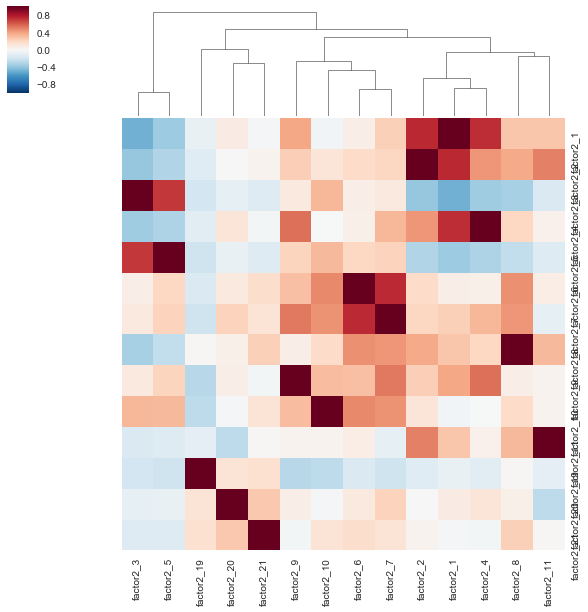

In [145]:
g = sns.clustermap(data_corr, row_cluster=False)

### z_score=0の場合
z_score=(実測値-平均)/標準偏差

/Users/ericfesta/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


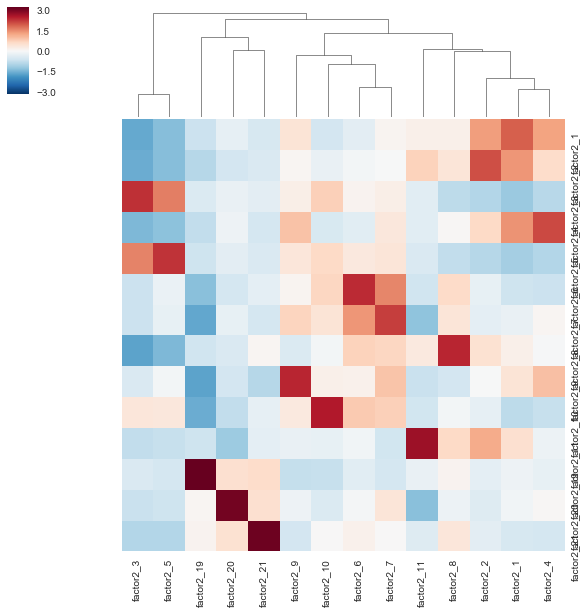

In [144]:
g = sns.clustermap(data_corr,row_cluster=False,z_score=0)

### 標準化ありのヒートマップ

/Users/ericfesta/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


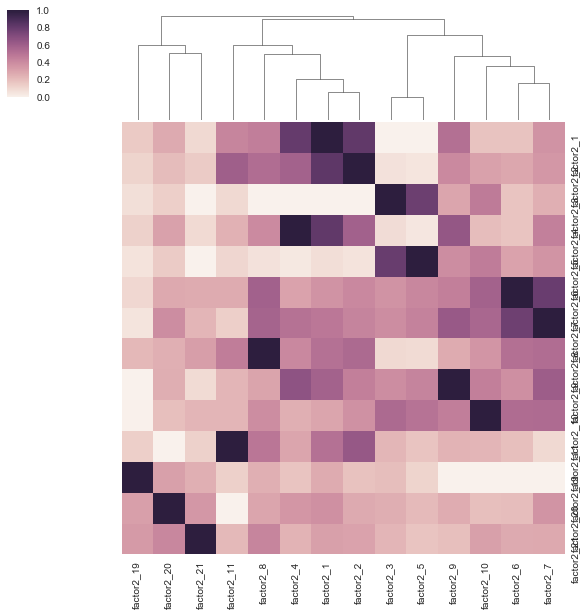

In [146]:
g = sns.clustermap(data_corr,row_cluster=False,standard_scale=1)

## 階層型クラスタリング（凝集型・ウォード法）
d(C1,C2)=E(C1∪C2)–E(C1)–E(C2)

/Users/ericfesta/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


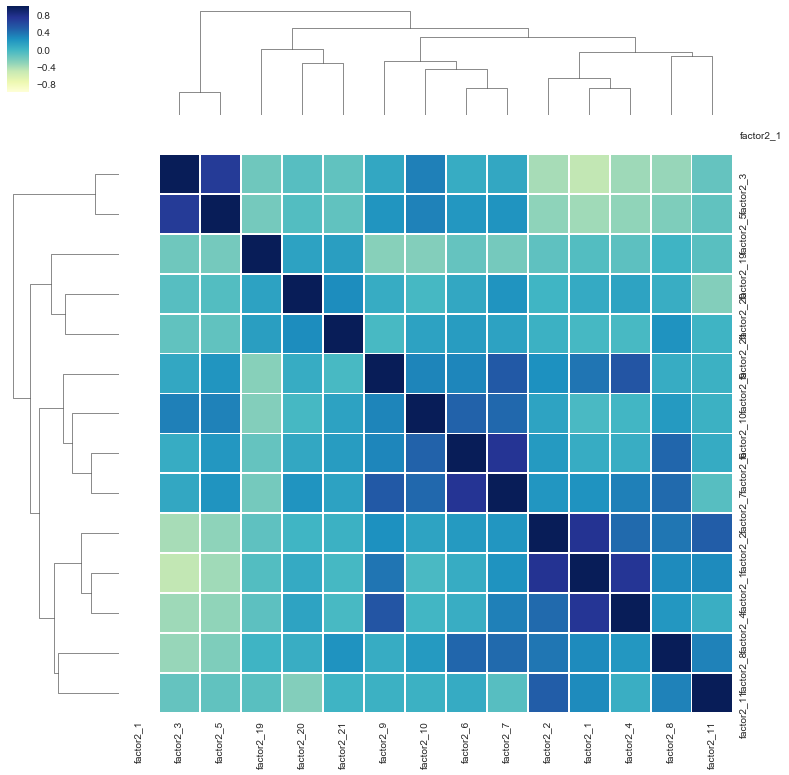

In [133]:
import seaborn as sns; sns.set(color_codes=True)
sns.set()

df = factor_data_init

data1 = factor_data_init["factor2_1"]
data2 = factor_data_init["factor2_2"]

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
# used_columns = (df.columns.get_level_values("network")
#                           .astype(int)
#                           .isin(used_networks))

network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

networks = data1
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

g = sns.clustermap(df.corr(), center=0, cmap="YlGnBu",
               row_colors=network_colors, col_colors=network_colors,
               linewidths=.75, figsize=(13, 13))

In [10]:
data3 = np.corrcoef(factor_data)

In [11]:
data3.transpose()

array([[ 1.        ,  0.29224055,  0.15257043, ...,  0.28640876,
         0.264584  ,  0.60797555],
       [ 0.29224055,  1.        ,  0.23791388, ...,  0.4951047 ,
         0.46205817,  0.73544103],
       [ 0.15257043,  0.23791388,  1.        , ...,  0.68364286,
         0.21280195,  0.34925513],
       ..., 
       [ 0.28640876,  0.4951047 ,  0.68364286, ...,  1.        ,
         0.11572238,  0.53061323],
       [ 0.264584  ,  0.46205817,  0.21280195, ...,  0.11572238,
         1.        ,  0.64624524],
       [ 0.60797555,  0.73544103,  0.34925513, ...,  0.53061323,
         0.64624524,  1.        ]])

# 結論

テスト的に、活動性とその他の要素（13つ）の相関を見たが、最も相関の大きいのは社交性で、次に新規性だった。
確かに、活動的な人は、社交的で新しいことをやる印象が実生活でも見受けられ、今回はデータで再確認することができ、新たな発見となった。

また、全体的に相関を見ると、

・相関の高い要素（相関係数）

活動性と社交性　0.755537

固執性と主体性　0.748917

慎重性と固執性　0.703754

慎重性と主体性　0.062926

新規性と論理性　0.549318


・相関の低い要素

活動性と慎重性　-0.481693

社交性と慎重性　-0.383580

活動性と固執性　-0.366920

慎重性と新規性　-0.357093

新規性と固執性　-0.305962


・クラスタリング

ー（慎重性＊固執性）＊（その他）

ーー（傾聴スキル＊（葛藤対処スキル＊自己主張スキル））

ーーー（葛藤対処スキル＊自己主張スキル）


ーーー（論理型＊（共感型＊（主体性＊決断性））

ーーーー（共感型＊（主体性＊決断性））

ーーーーー（主体性＊決断性）


ーーー（（社交性＊（活動性＊新規性））＊（精神的耐性＊直感型））

ーーーー（社交性＊（活動性＊新規性）

ーーーーー（活動性＊新規性）

ーーーー（精神的耐性＊直感型）

クラスタリングの結果、慎重性と固執性が残り12要素の性格に関連を大きく持つ事がわかる

問題点としては、有意や検定を今回行っていないことや因子分析の定形通りに調査できてないことが上げられ、今後は有意や検定などの信用付けおよび、一般的な統計の調査の流れに当てはめて書くようにしていく。

全体的な感想としては、
実生活でなんとなく思っていたことが数値でも証明できるということが私は大きな収穫だった。例えば、「活動性と社交性」が相関がたかいと言うのは、言い換えれば「アクティブな人は人付き合いが特異」といった皆が無意識下で当たり前と思っていることが統計で証明できるというのは、初めての経験で実にオモシロイと思った。
一方で、活動性と社交性が相関が高いといった結果もより掘り下げて調査が可能だと思っていて、因果関係はどちらが原因でどちらが結果であるかも調べる必要があるし、活動性と社交性は14要因の中での結果もまだ調査する必要があるので、さらに学習を進めて応用的に進めるべきであると思った。

## KNNの予測値

In [35]:
df = factor_data

### SVD 特異値分解

In [78]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import svds, eigs


data1 = factor_data["factor2_1"]
data2 = factor_data["factor2_2"]

data1_idx, data2_idx = {}, {}

for i in range(len(df.factor2_1)):
    data1_idx[data1[i]] = i
for i in range(len(df.foctor2_2)):
    data1_idx[data2[i]] = i
    
nTrainUsers = len(data1.index)
nTrainPubs = len(data2.index)
V = sp.lil_matrix((nTrainUsers, nTrainPubs))
def matput(imp):
    if imp.viewed:
        V[data1_idx[imp.data1], data2_idx[imp.data2]] = 1
        
df.apply(matput, axis=1)

# SVD(疎行列のSVD)
u, s, vt = svds(V, k =100)
plt.plot(s[::-1])

AttributeError: ("'Series' object has no attribute 'viewed'", 'occurred at index 0')

In [101]:
TT = factor_data.values[:10]

In [102]:
from sklearn.neighbors import NearestNeighbors

In [105]:
weightFunctions = {
    'f1': lambda x: [1 for i in range(len(x))], # 等しく重み付け
    'f2': lambda x: 1 / x, # 1/ distance
    'f3': lambda x: 1/ x ** 2 # 1/distance の2乗
}

#　３つの重み付けごとにk=1~30 で予測された目的値を計算
for idx, f in enumerate(weightFunctions): # idx=x of index, f=f1,f2,f3
    rmseL = []
    wf = weightFunctions[f]
    
    for nNeighbors in range(1, 30):
        
        # 初期化
        neigh = NearestNeighbors(nNeighbors)
        
        # kこの最近傍を検索
        VT = factor_data.values
        #VTはトレーニングセットから転値されたユーザー / アイテム行列
        neigh.fit(VT)
        act = pd.Series() # Series = データフレーム作成
        pred = pd.Series()
        
        TT = factor_data.values[:10]
        # TTはテストセットから転値されたユーザ　/ アイテム行列
        for i in range(TT.shape[0]):
            d = neigh.kneighbors(TT[i, :].reshape(1,-1),
                                return_distance=True)
            W = pd.Series([v for v in d[0][0]])
            y = pd.Series(pubsums.iloc[d[1][0]].CTR)
            act.append(pd.Series(tsums.iloc[i].CTR))
            pred.append(pd.Series(np.average(y, weights = wf(W))))
            
        rmse = \
        ((act.sub(pred).pow(2).mean()) ** .5 / (act.max() - act.min())) * 100
        rmseL.append(rmse)
        
    plt0 = plt.subplot(130+idx+1)
    plt0 = plot(range(1, 30, 1), rmseL)
    plt.tigh_layout(pad=2.0)
            

NameError: name 'pubsums' is not defined

In [89]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import cross_validation

/Users/ericfesta/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
